In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
np.random.seed(0)
X = np.random.normal(0, 5, 10000)
epsilon = np.random.normal(0, 1, 10000)

beta_0 = 100
beta_1 = 0.3

Y = beta_0 + beta_1*X + epsilon

This note is about the logic behind the beta hypothesis testing. 

We usually run a hypothesis test to test whether the true population value is equal to a hypothesized value or not using a sample. To test that, we use t-statistics and correponding p-values. Here I am going to explain how t-stats and p-values are valid for testing the hypothesis. 

First of all, let's generate a hypothetical population data. 

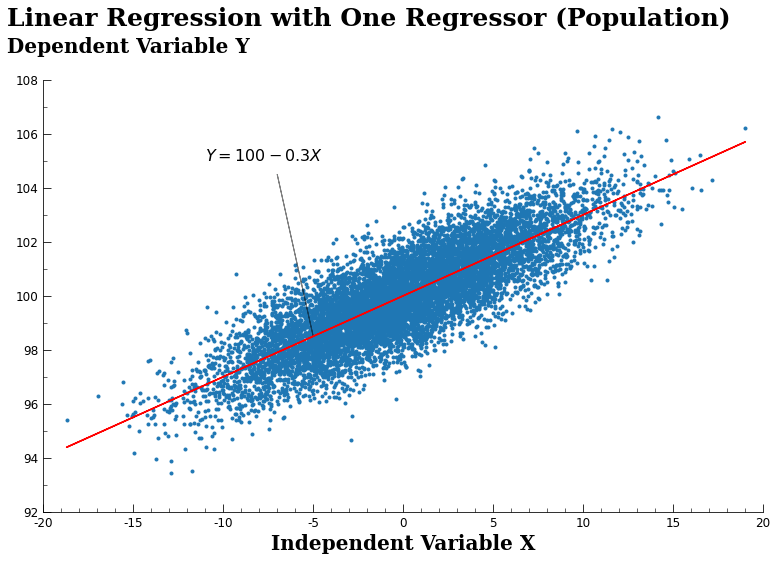

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(X, Y, marker=".")
ax.plot(X, beta_0 + beta_1*X, color="red")

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(92, 108)
ax.set_xlim(-20, 20)

ax.set_xlabel("Independent Variable X", fontfamily='serif', fontsize=20, fontweight="bold")
ax.text(-22,109,'Dependent Variable Y', fontfamily='serif', fontsize=20, ma='center', fontweight='bold')
ax.text(-22,110,'Linear Regression with One Regressor (Population)', fontfamily='serif', fontsize=25, ma='center', fontweight='bold')

ax.arrow(-5, 98.5, -2, 6, alpha=0.5)
ax.text(-11, 105, r'$Y=100-0.3X$', fontsize=16)

plt.show()

In [4]:
xy_observation = np.array([X.tolist(), Y.tolist()])
xy_observation = xy_observation.transpose()
print("The first column is X and the second column is Y.")
print()
print(xy_observation)

The first column is X and the second column is Y.

[[  8.82026173 102.44396149]
 [  2.00078604  99.76700481]
 [  4.89368992 103.20170722]
 ...
 [  2.58436089 100.71804902]
 [ -0.16460347  98.8916877 ]
 [  6.49055716 101.62063871]]


### Still have to correct this staring from here: I did it wrong. I generated the z-distribution based on the true population mean. 

In the previous note (note_1), I have shown you how a drawn sample can estimate the true population coefficients, $\beta_0$ and $\beta_1$. The estimates are the $\widehat{\beta_0}$ and the $\widehat{\beta_1}$. But the estiamtes could be different from our hypothesized values for the population coefficients. We can probably hypothesize that the true population coefficient for $\beta_1$ is zero. We can also hypothesize that the coefficient for $\beta_1$ is some other value. But for the sake of the experiment, let's hypothesize that $\beta_1$ = 0.3.  

Setting up a hypothesis for $\beta_1$. 

H0: $\beta_1 = 0.3$  

HA: $\beta_1 \neq 0.3$ 

And we are told that if the t_statistic for the estimate is bigger than 1.96 or smaller than -1.96, then we reject the null hypothesis. But what does that mean? 

Let me pause here and jump on to Z-statistic. Let's treat Z-statistic and t-statistic as a same thing just for now. So I am going to start talking in terms of Z-statistic instead of t-statistic. 

Okay, so the logic behind this Z-test is the following. In the previous example, we have drawn a sample size of 100. And let's assume that we take infinitiely many samples in size of 100. And if we were to plot the frequency distribution of the coefficients that we get from different sampels, then we get something like below. It looks normal. In fact, it fits quite well under the normal pdf. It these distributions are called **sampling distributions of beta coefficients**. 

In [5]:
beta_0_hat_list = []
beta_1_hat_list = []

for i in range(5000):
    inx = np.random.randint(10000, size=100)
    sample = xy_observation[inx]
    sample = sm.add_constant(sample)
    
    sample_results = sm.OLS(sample[:,2], sample[:,0:2]).fit()
    beta_0_hat = sample_results.params[0]
    beta_1_hat = sample_results.params[1]
    
    beta_0_hat_list.append(beta_0_hat)
    beta_1_hat_list.append(beta_1_hat)

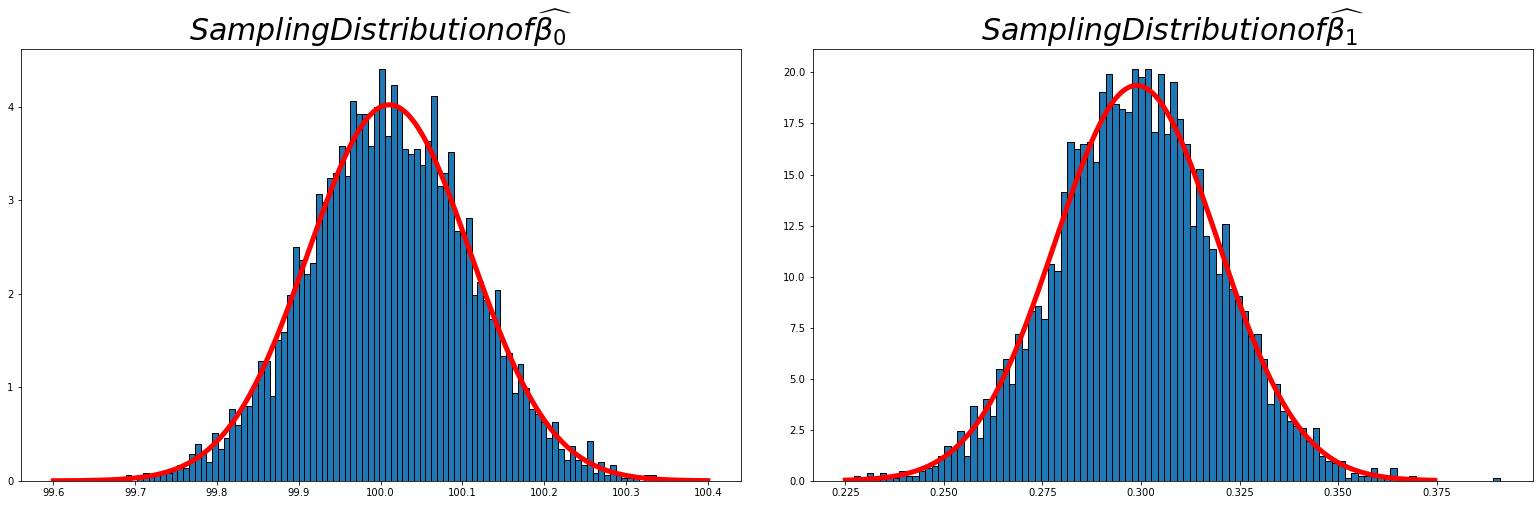

In [41]:
fig = plt.figure(figsize=(10,6))

x_0 = np.arange(99.6, 100.4, .0005)
x_1 = np.arange(0.225, 0.375, .0005)

mu_beta_0 = np.mean(beta_0_hat_list)
mu_beta_1 = np.mean(beta_1_hat_list)

std_beta_0 = np.std(beta_0_hat_list)
std_beta_1 = np.std(beta_1_hat_list)


ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1, 0, 1, 1])


ax_0.hist(beta_0_hat_list, bins=100, ec="black", density=True)
ax_0.plot(x_0, stats.norm.pdf(x_0, mu_beta_0, std_beta_0), color='red', lw=5)

ax_1.hist(beta_1_hat_list, bins=100, ec="black", density=True)
ax_1.plot(x_1, stats.norm.pdf(x_1, mu_beta_1, std_beta_1), color='red', lw=5)

ax_0.set_title(r"$Sampling Distribution of \widehat{\beta_0}$", fontsize=30)
ax_1.set_title(r"$Sampling Distribution of \widehat{\beta_1}$", fontsize=30)

plt.show()

In [7]:
# Here, I am converting each values of beta_0_hat to z_statistic values.
z_stat_beta_0 = ((np.array([beta_0_hat_list])-mu_beta_0)/std_beta_0).tolist()[0]
# Here, I am converting each values of beta_1_hat to z_statistic values.
z_stat_beta_1 = ((np.array([beta_1_hat_list])-mu_beta_1)/std_beta_1).tolist()[0]

Now, let's turn each estimate into z_values by subtractring each by the mean of the estimates and divide each by the standard deviation of the estimates. (And in fact, the mean here is the true $\beta_1$ from the population. The proof for that is provided at the end of the note.) We get the the distribution like below. It looks same as the ones above but if you look carefully, the y-axis and the x-axis values are different. 

When we turn each estimates into z_values and plot the distribution, we know that the distribution has the mean of zero and the standard deviation of 1, while maintaining the normal shape. So it becomes the z-distribution (AKA Standard Normal Distribution) which is same as the normal distribution with mean value 0 and standard deviation of 1. 

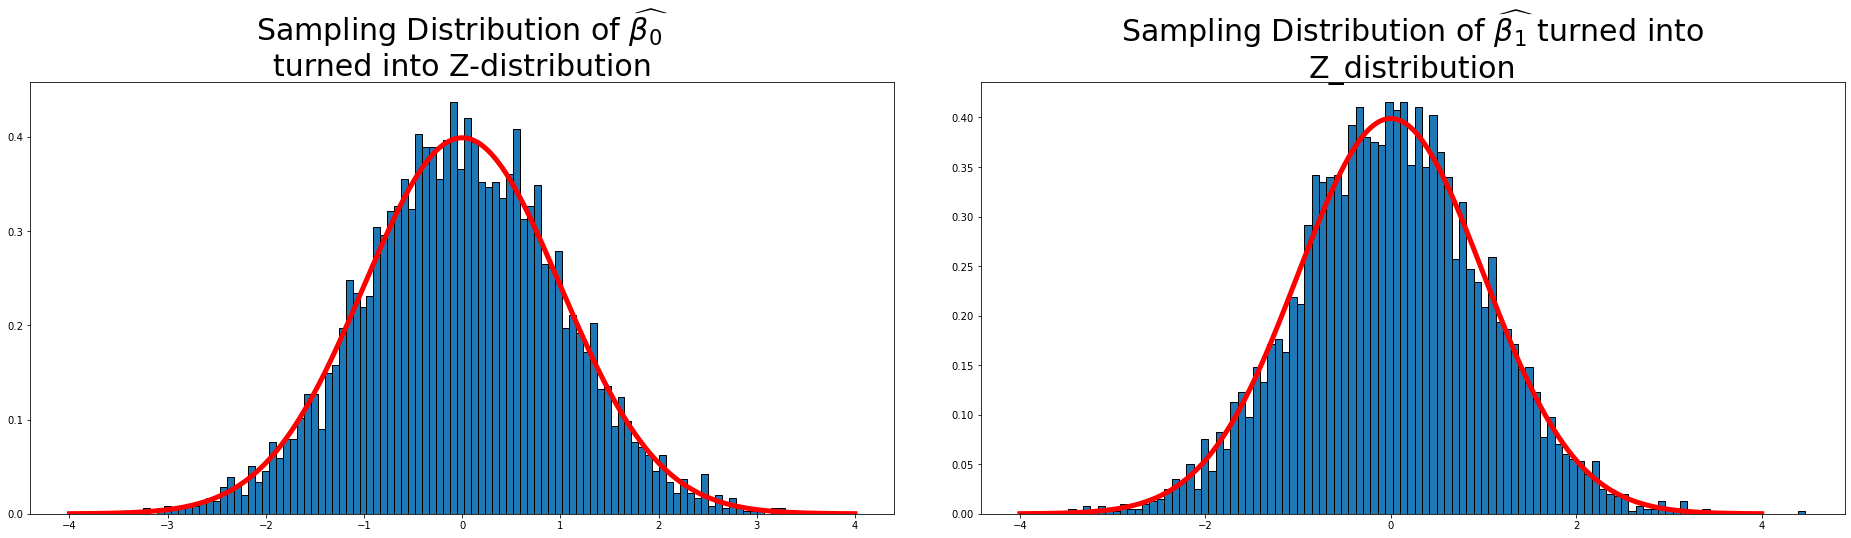

In [85]:
fig = plt.figure(figsize=(12,6))

x_0 = np.arange(-4, 4, .0005)
x_1 = np.arange(-4, 4, .0005)

mu_beta_0 = np.mean(z_stat_beta_0)
mu_beta_1 = np.mean(z_stat_beta_1)

std_beta_0 = np.std(z_stat_beta_0)
std_beta_1 = np.std(z_stat_beta_1)


ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1, 0, 1, 1])


ax_0.hist(z_stat_beta_0, bins=100, ec="black", density=True)
ax_0.plot(x_0, stats.norm.pdf(x_0, mu_beta_0, std_beta_0), color='red', lw=5)

ax_1.hist(z_stat_beta_1, bins=100, ec="black", density=True)
ax_1.plot(x_1, stats.norm.pdf(x_1, mu_beta_1, std_beta_1), color='red', lw=5)

ax_0.set_title("\n".join(wrap(r"Sampling Distribution of $\widehat{\beta_0}$ turned into Z-distribution",50)), fontsize=30)
ax_1.set_title(r"Sampling Distribution of $\widehat{\beta_1}$ turned into Z_distribution", wrap=True, fontsize=30)


plt.show()

For more clear demonstration, I am going to take the beta_1 sampling distribution as an example. I have turned the beta_1 sampling distribution into z_distribution. And it looks as below. In the hypothesis testing, we usually set the significance level of 5%. If we run a two tailed test, each tail takes the probability of 2.5%. If the z-statistic of our estimate calculated from a drawn sample falls under this tail regions, then we reject the null hypothesis.

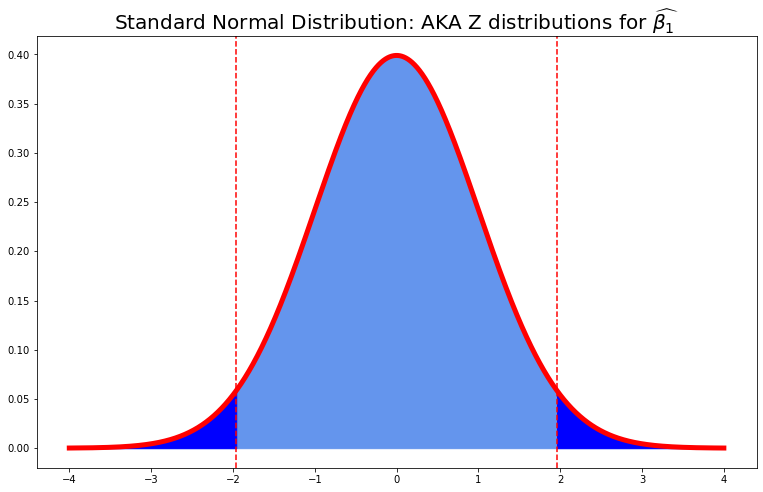

In [9]:
fig = plt.figure(figsize=(10,6))

x = np.arange(-4, 4, 0.0005)

ax = fig.add_axes([0,0,1,1])

ax.plot(x, stats.norm.pdf(x,0,1), color="red", lw=5)

ax.axvline(1.96, color='red', linestyle="--")
ax.axvline(-1.96, color='red', linestyle="--")

right_tail_x = np.arange(1.96, 4, 1/20)
right_tail_y = stats.norm.pdf(right_tail_x, 0, 1)
left_tail_x = np.arange(-1.96, -4, -1/20)
left_tail_y = stats.norm.pdf(left_tail_x, 0, 1)


ax.fill_between(x, stats.norm.pdf(x,0,1), color="cornflowerblue")

ax.fill_between(right_tail_x, right_tail_y, color="blue")
ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.set_title(r"Standard Normal Distribution: AKA Z distributions for $\widehat{\beta_1}$", fontsize=20)


plt.show()

But let's say we have drawn a sample and that have given us the $\widehat{\beta_1}$ of 0.35.  

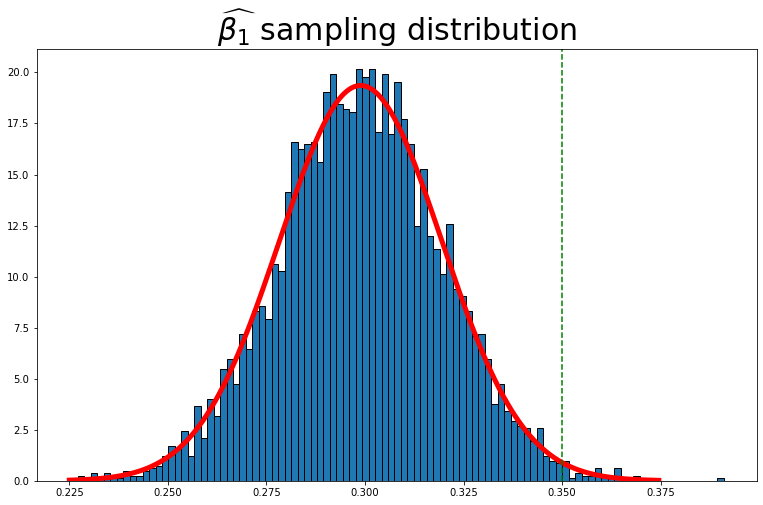

In [86]:
fig = plt.figure(figsize=(10,6))

x_1 = np.arange(0.225, 0.375, .0005)
mu_beta_1 = np.mean(beta_1_hat_list)
std_beta_1 = np.std(beta_1_hat_list)

ax_1 = fig.add_axes([1.1, 0, 1, 1])
ax_1.hist(beta_1_hat_list, bins=100, ec="black", density=True)
ax_1.plot(x_1, stats.norm.pdf(x_1, mu_beta_1, std_beta_1), color='red', lw=5)
ax_1.set_title(r"$\widehat{\beta_1}$ sampling distribution", fontsize=30)
ax_1.axvline(0.35, color='green', linestyle="--")

plt.show()

And if we turn that into the z-distribution, the z-stats for the $\widehat{\beta_1} = 0.35$ is 2.48 and it falls under the null hypothesis rejection region. So we reject the null hypothesis. What does that even mean? It means that there is a higher probability that this sample came from a population that takes true $\beta_1$ of something bigger than 0.3. As you can see, it is totally possible that this sample comes from our original populaiton. Because this number, 0.35 is still under our original sampling distribution. But we are taking a risk of making an error because there is only small possibility that the previous statement holds true. 

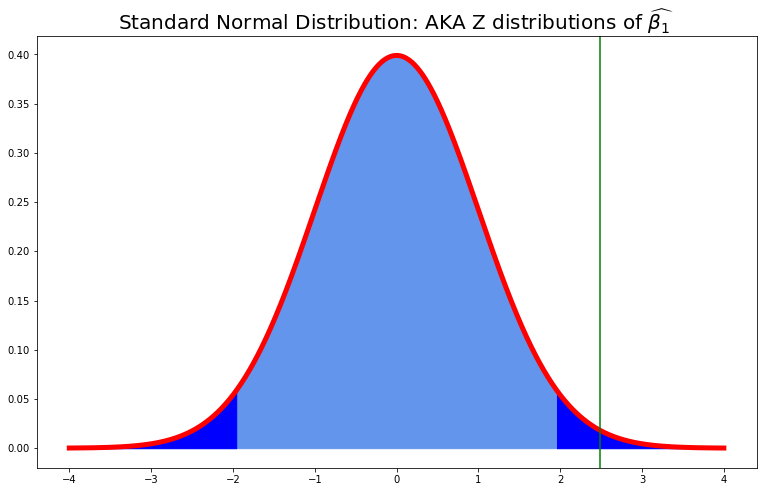

In [87]:
fig = plt.figure(figsize=(10,6))

x = np.arange(-4, 4, 0.0005)

ax = fig.add_axes([0,0,1,1])

ax.plot(x, stats.norm.pdf(x,0,1), color="red", lw=5)

#ax.axvline(1.96, color='red', linestyle="--")
#ax.axvline(-1.96, color='red', linestyle="--")

right_tail_x = np.arange(1.96, 4, 1/20)
right_tail_y = stats.norm.pdf(right_tail_x, 0, 1)
left_tail_x = np.arange(-1.96, -4, -1/20)
left_tail_y = stats.norm.pdf(left_tail_x, 0, 1)


ax.fill_between(x, stats.norm.pdf(x,0,1), color="cornflowerblue")

ax.fill_between(right_tail_x, right_tail_y, color="blue")
ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.set_title(r"Standard Normal Distribution: AKA Z distributions of $\widehat{\beta_1}$", fontsize=20)

z_stat = (0.35-mu_beta_1)/std_beta_1

ax.axvline(z_stat, color='green', linestyle="-")
plt.show()

In [95]:
3*(std_beta_1)+mu_beta_1

0.3607010206235897

### Oh shit! I thought I could think like this, but I can't. I can only think of it this way from the sampling distribution. Do this on the sampling distribution not on the z distribution. Make changes from here. 

So our hypothetical $\widehat{\beta_1}$ falls under the rejection region. But let's try to think of it this way. The green colored distribution is a z-distribution that was taken from the sampling distribution which takes the true $\beta_1$ of 0.36. 

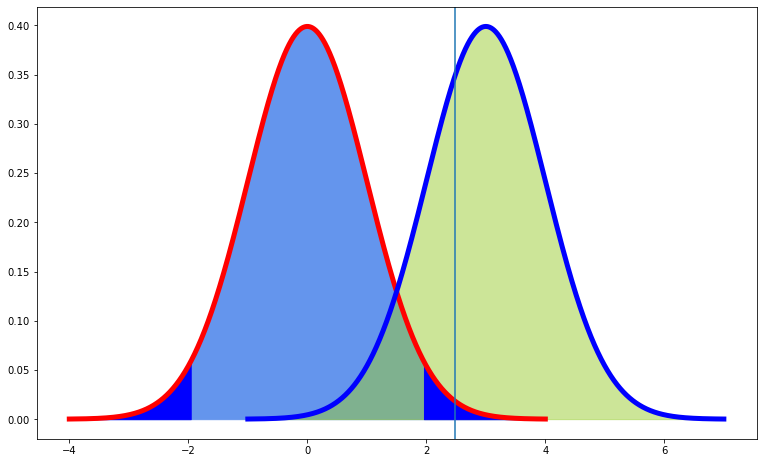

In [93]:
fig = plt.figure(figsize=(10,6))

x_1 = np.arange(-4, 4, 0.0005)
x_2 = np.arange(-1, 7, 0.0005)

ax = fig.add_axes([0,0,1,1])

ax.plot(x_1, stats.norm.pdf(x_1, 0, 1), color='red', lw=5)
ax.plot(x_2, stats.norm.pdf(x_2, (0+3), 1), color='blue', lw=5)


ax.fill_between(x_1, stats.norm.pdf(x_1,0,1), color="cornflowerblue")
ax.fill_between(x_2, stats.norm.pdf(x_2,0+3,1), color="yellowgreen", alpha=0.5)


right_tail_x = np.arange(1.96, 4, 1/20)
right_tail_y = stats.norm.pdf(right_tail_x, 0, 1)
left_tail_x = np.arange(-1.96, -4, -1/20)
left_tail_y = stats.norm.pdf(left_tail_x, 0, 1)

ax.fill_between(right_tail_x, right_tail_y, color="blue")
ax.fill_between(left_tail_x, left_tail_y, color="blue")

ax.axvline(z_stat)



plt.show()

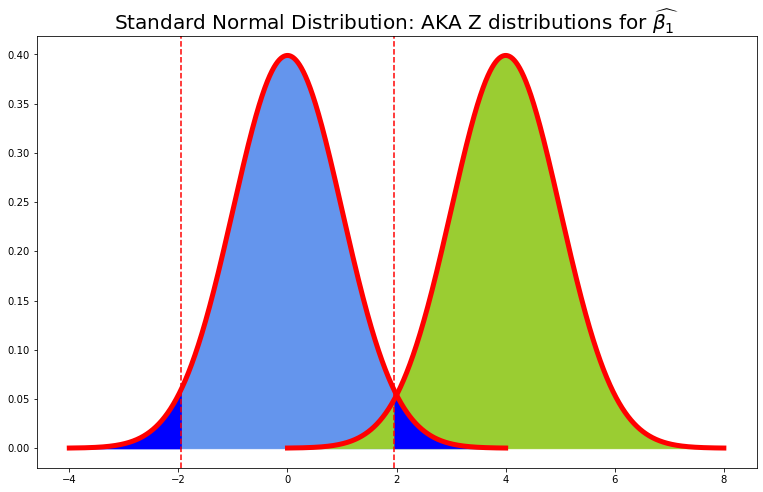

In [11]:
fig = plt.figure(figsize=(10,6))

x_1 = np.arange(-4, 4, 0.0005)
x_2 = np.arange(0, 8, 0.0005)


ax = fig.add_axes([0,0,1,1])

ax.plot(x_1, stats.norm.pdf(x_1,0,1), color="red", lw=5)
ax.plot(x_2, stats.norm.pdf(x_2,4,1), color="red", lw=5)


ax.axvline(1.96, color='red', linestyle="--")
ax.axvline(-1.96, color='red', linestyle="--")

right_tail_x = np.arange(1.96, 4, 1/20)
right_tail_y = stats.norm.pdf(right_tail_x, 0, 1)
left_tail_x = np.arange(-1.96, -4, -1/20)
left_tail_y = stats.norm.pdf(left_tail_x, 0, 1)


ax.fill_between(x_1, stats.norm.pdf(x_1,0,1), color="cornflowerblue")
ax.fill_between(x_2, stats.norm.pdf(x_1,0,1), color="yellowgreen")



ax.fill_between(right_tail_x, right_tail_y, color="blue")
ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.fill_between(left_tail_x, left_tail_y, color="blue")


ax.set_title(r"Standard Normal Distribution: AKA Z distributions for $\widehat{\beta_1}$", fontsize=20)


plt.show()

In [12]:
np.cov(beta_0_hat_list, beta_1_hat_list)

array([[9.84792690e-03, 5.30392836e-05],
       [5.30392836e-05, 4.24762584e-04]])

Looks like beta_0 and beta_1 has 0 covariance. Can we test this using F-test? I think so. 


We have to test if the estimates are statistically significant. In other words, it's testing if the estimates are not equal to the value, zero.   

$\widehat{\beta_1} = \frac{\frac{\sum Y_iX_i}{n} - \bar{X}\bar{Y}}{\frac{\sum X_i^2}{n}-\bar{X}^2} = \frac{S_{xy}^2}{S_x^2} = \frac{\sum(X_i-\bar{X})(Y_i-\bar{Y})}{\sum(X_i-\bar{X})^2}$


### Side Note: Proof for $E[\widehat{\beta_1}] = \beta_1$

$\widehat{\beta_{1,i}} = \frac{\sum(X_i-\bar{X})(Y_i-\bar{Y})}{\sum(X_i-\bar{X})^2}$

= $\frac{\sum_{j}^n(X_{i,j}-\bar{X_i})Y_{i,j} -\sum_{j}^n(X_{i,j}-\bar{X_i})\bar{Y_i}}{\sum_{i}^n(X_{i,j}-\bar{X_i})^2}$

= $\frac{\sum_{j}^n(X_{i,j}-\bar{X_i})Y_{i,j} -\bar{Y_i}\sum_{j}^n(X_{i,j}-\bar{X_i})}{\sum_{i}^n(X_{i,j}-\bar{X_i})^2}$

Note that, $\sum_{i}^n(X_{i,j}-\bar{X_i}) = 0$

= $\frac{\sum_{j}^n(X_{i,j}-\bar{X_i})Y_{i,j}}{\sum_{i}^n(X_{i,j}-\bar{X_i})^2}$

= $\frac{\sum_{j}^n(X_{i,j}-\bar{X_i})(\beta_0+\beta_1X_{i,j}+\epsilon_{i,j})}{\sum_{i}^n(X_{i,j}-\bar{X_i})^2}$

= $\frac{\sum_{j}^n(X_{i,j}-\bar{X_i})(\beta_1X_{i,j}+\epsilon_{i,j})}{\sum_{i}^n(X_{i,j}-\bar{X_i})^2}$

= $\frac{\beta_1\sum_j^n(X_{i,j}-\bar{X_i})X_{i,j}+\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}}{\sum_j^n(X_{i,j}-\bar{X_i})^2}$

Note that, $\sum_j^n(X_{i,j}-\bar{X_i})X_{i,j} = \sum_j^n(X_{i,j}-\bar{X_i})^2$

= $\beta_1 + \frac{\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}}{\sum_j^n(X_{i,j}-\bar{X_i})^2}$

### Now, let's take the expectation! 

$E[\widehat{\beta_{1,i}}] = \beta_1 + E[\frac{\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}}{\sum_j^n(X_{i,j}-\bar{X_i})^2}]$

Note that $E[X] = E[\bar{X_i}] = E[E[X_{i,j}|\{X\}_i]]$  

$= \beta_1 + E[E[\frac{\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}}{\sum_j^n(X_{i,j}-\bar{X_i})^2}|\{X\}_i]]$

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}E[\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}|\{X\}_i]]$

Note that $\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}$ and $E[\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}|\{X\}_i]$ are constants when one set of $\{X\}_i$ is given. Therefore they are independent. And that means I can distributute the expectation. 

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}] \cdot E[E[\sum_j^n(X_{i,j}-\bar{X_i})\epsilon_{i,j}|\{X\}_i]]$ 

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}] \cdot E[E[(\sum_j^nX_{i,j}\epsilon_{i,j}-\bar{X_i}\sum_j^n\epsilon_{i,j})|\{X\}_i]]$

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}] \cdot E[E[(\sum_j^nX_{i,j}\epsilon_{i,j}|\{X\}_i]]-E[E[\bar{X_i}\sum_j^n\epsilon_{i,j})|\{X\}_i]]$

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}] \cdot (E[\sum_j^nX_{i,j}\epsilon_{i,j}] - E[\bar{X_i}\sum_j^n\epsilon_{i,j})])$

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}] \cdot (n \cdot E[X_i\epsilon_i] - E[\bar{X_i}] \cdot E[\sum_j^n\epsilon_{i,j})])$

$= \beta_1 + E[\frac{1}{\sum_j^n(X_{i,j}-\bar{X_i})^2}] \cdot (n \cdot E[X_i] \cdot E[\epsilon_i] - E[\bar{X_i}] \ \cdot n \cdot E[\epsilon_i)])$

**Therefore**

$= \beta_1$


### I want to test if covariance and variance are independent. But for now, I'll just assume that they are independent.